# 1. Load and exploring the data

In [1]:
# import pandas
import pandas as pd              
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

# define support function
def inspect_data(df, col=None, n_rows=5):
    # check data shape
    print(f'data shape: {df.shape}')
    
    # define columns
    if col is None:
        col = df.columns
    
    # check data head, use display function to display dataframe
    display(df[col].head(n_rows))
    
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique=df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    unique_counts = df.nunique(dropna=False)
    df_miss=pd.DataFrame({'missing_percentage':percent,'missing_frequency':freq,'types':types,'count_value':unique_counts,
                          'unique_values':unique})
    if sort:df_miss.sort_values(by='missing_frequency',ascending=False, inplace=True)
    return df_miss[df_miss['missing_percentage']>=cut_off]

# load file loan_data_2007_2014.csv to DataFrame given df as variable
df = pd.read_csv('loan_data.csv')

# inspect data
inspect_data(df)

C:\Users\wibow\AppData\Local\Temp\ipykernel_14852\299068194.py:30: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data.csv')


data shape: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# check missing value
check_missing(df)

,missing_percentage,missing_frequency,types,count_value,unique_values
inq_last_12m,100.000000,466285,float64,1,[nan]
total_bal_il,100.000000,466285,float64,1,[nan]
dti_joint,100.000000,466285,float64,1,[nan]
verification_status_joint,100.000000,466285,float64,1,[nan]
annual_inc_joint,100.000000,466285,float64,1,[nan]
open_acc_6m,100.000000,466285,float64,1,[nan]
open_il_6m,100.000000,466285,float64,1,[nan]
open_il_12m,100.000000,466285,float64,1,[nan]
open_il_24m,100.000000,466285,float64,1,[nan]
mths_since_rcnt_il,100.000000,466285,float64,1,[nan]


In [3]:
#describe dataframe
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# checking for duplicated data
df.duplicated().any()

False

In [5]:
df.id.nunique()

466285

In [6]:
df.member_id.nunique()

466285

# 2. Defining the label and making target column
loan_status column will be our label to make the target with:
- 'good' label will be 'Fully Paid', and 'Does not meet the credit policy. Status:Fully Paid' loan status
- row with 'Current' loan status will be dropped since we couldn't determine yet wether it is bad or good
- other loan status will be labeled 'bad'

In [7]:
# Check value for loan_status
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [9]:
# dropping row with 'Current' value in loan_status column
df = df[df['loan_status'] != 'Current']

In [10]:
# import numpy
import numpy as np

# define conditions
conditions = [
    (df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])),
    (df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 
                             'Default', 'Does not meet the credit policy. Status:Charged Off']))
]

# define corresponding values good and bad (categorical)
values = ['good','bad']

# create the new column based on conditions
df['loan_label'] = np.select(conditions, values, default='Unknown')

In [11]:
df.shape

(242059, 76)

In [12]:
df['loan_label'].value_counts(normalize=True)*100

good    77.14111
bad     22.85889
Name: loan_label, dtype: float64

In [13]:
df.loan_label.value_counts()

good    186727
bad      55332
Name: loan_label, dtype: int64

# 3. Feature engineering and selection
in this section if needed we will :
- drop column who have high threshold of missing value (20% or more)
- drop column who consist all unique value
- drop column than only have 1 unique value
- drop column that contain free text value
- drop based target column(loan_status column)
- drop column with 1 dominant category
- drop numerical column that have high corelation with other column (excluding the target column)
- drop categorical column with high cardinality
- drop other column we won't be using in the model (expert judgment)
- manipulate value on features including handling missing value

In [14]:
# drop column who have high threshold of missing value (20% or more)
threshold = len(df) * 0.8
df = df.dropna(axis=1, thresh=threshold)

# drop column who have all unique value
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]
df = df.drop(columns=unique_cols)

# drop column with only 1 unique value
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=single_value_cols)

# drop free text value column
#df = df.drop(columns=['desc'])
# have been dropped due to high missing value

# drop based target column
df = df.drop(columns=['loan_status'])

In [15]:
# checking column with 1 dominant category, 80% will be the threshold
for col in df.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = df[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        print(value_counts_percentage)
        print('\n')

n    99.997108
y     0.002892
Name: pymnt_plan, dtype: float64




In [16]:
# drop column with 1 dominant category automaticaly, 80% will be the threshold
for col in df.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = df[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        df = df.drop(columns=col)

C:\Users\wibow\AppData\Local\Temp\ipykernel_14852\930171944.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


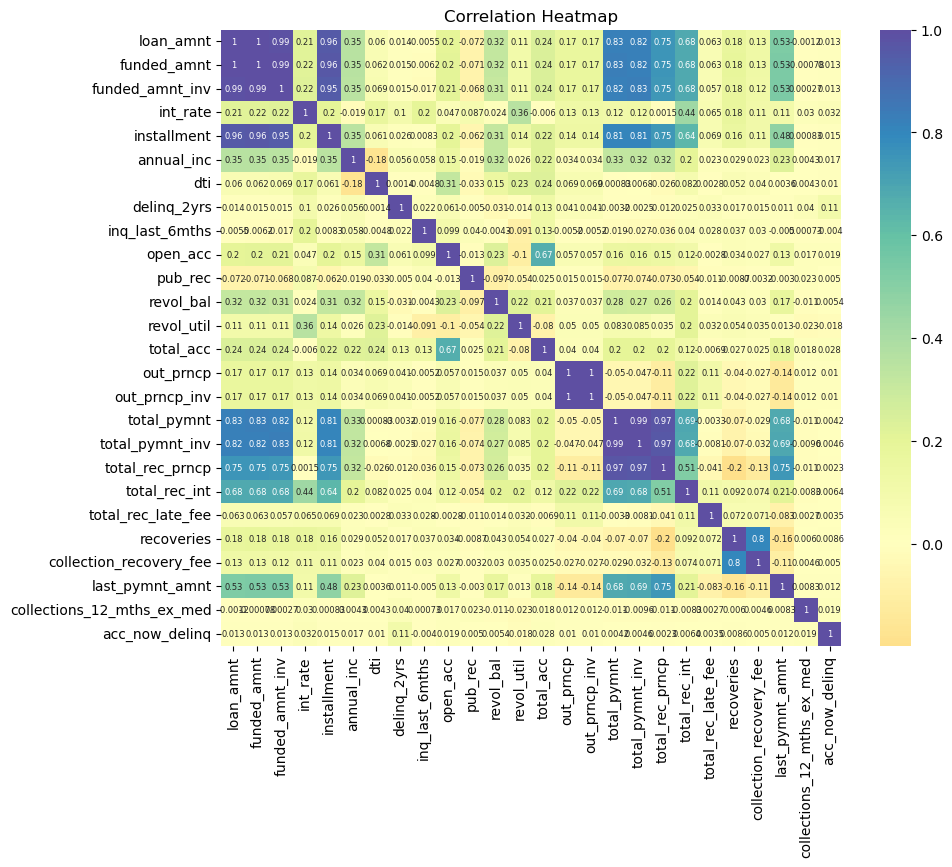

In [17]:
# checking the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# drop column that have high corelation with other column (correlation coefficient >0.5 or <-0.5), choose 1 column to stay
df = df.drop(columns=['funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','total_rec_prncp',
                      'total_rec_int','last_pymnt_amnt','collection_recovery_fee','out_prncp_inv','open_acc'])

C:\Users\wibow\AppData\Local\Temp\ipykernel_14852\2158520228.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


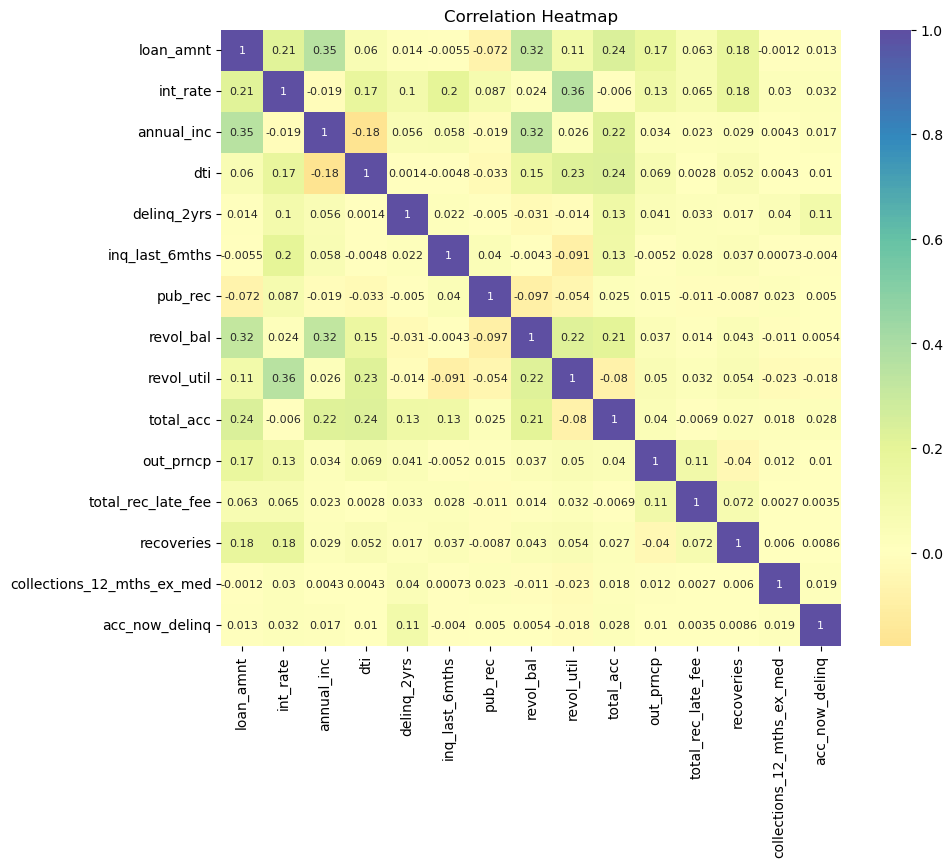

In [19]:
# checking the correlation matrix
correlation_matrix = df.corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df.shape

(242059, 32)

In [21]:
check_missing(df)

,missing_percentage,missing_frequency,types,count_value,unique_values
emp_title,5.623009,13611,object,131131,"[nan, Ryder, AIR RESOURCES BOARD, Veolia Trans..."
emp_length,3.853193,9327,object,12,"[10+ years, < 1 year, 3 years, 9 years, 4 year..."
last_pymnt_d,0.155334,376,object,99,"[Jan-15, Apr-13, Jun-14, Apr-12, Nov-12, Jun-1..."
revol_util,0.096671,234,float64,1206,"[83.7, 9.4, 98.5, 21.0, 28.3, 87.5, 32.6, 36.5..."
collections_12_mths_ex_med,0.059903,145,float64,8,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
delinq_2yrs,0.011981,29,float64,24,"[0.0, 2.0, 3.0, 1.0, 4.0, 6.0, 5.0, 8.0, 7.0, ..."
pub_rec,0.011981,29,float64,13,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 9.0, ..."
earliest_cr_line,0.011981,29,object,635,"[Jan-85, Apr-99, Nov-01, Feb-96, Nov-04, Jan-0..."
total_acc,0.011981,29,float64,104,"[9.0, 4.0, 10.0, 37.0, 12.0, 13.0, 3.0, 23.0, ..."
inq_last_6mths,0.011981,29,float64,29,"[1.0, 5.0, 2.0, 3.0, 0.0, 4.0, 6.0, 7.0, 8.0, ..."


In [22]:
# at this point we have 32 features, i'm going to set it as threshold for determining high cardinality
# drop categorical column with high cardinality (unique value count > 32) and expert judgement (i.e : sub_grade will be dropped)
df = df.drop(columns=['emp_title','last_pymnt_d','earliest_cr_line','last_credit_pull_d','title','addr_state','zip_code',
                      'issue_d','sub_grade'])

In [23]:
df.shape

(242059, 23)

In [24]:
check_missing(df)

,missing_percentage,missing_frequency,types,count_value,unique_values
emp_length,3.853193,9327,object,12,"[10+ years, < 1 year, 3 years, 9 years, 4 year..."
revol_util,0.096671,234,float64,1206,"[83.7, 9.4, 98.5, 21.0, 28.3, 87.5, 32.6, 36.5..."
collections_12_mths_ex_med,0.059903,145,float64,8,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
inq_last_6mths,0.011981,29,float64,29,"[1.0, 5.0, 2.0, 3.0, 0.0, 4.0, 6.0, 7.0, 8.0, ..."
acc_now_delinq,0.011981,29,float64,7,"[0.0, 1.0, nan, 2.0, 3.0, 5.0, 4.0]"
delinq_2yrs,0.011981,29,float64,24,"[0.0, 2.0, 3.0, 1.0, 4.0, 6.0, 5.0, 8.0, 7.0, ..."
total_acc,0.011981,29,float64,104,"[9.0, 4.0, 10.0, 37.0, 12.0, 13.0, 3.0, 23.0, ..."
pub_rec,0.011981,29,float64,13,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 9.0, ..."
annual_inc,0.001652,4,float64,18914,"[24000.0, 30000.0, 12252.0, 49200.0, 36000.0, ..."
recoveries,0.000000,0,float64,22773,"[0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26..."


In [25]:
# handling missing value
# defining columns with missing value
categorical_columns = ['emp_length']
numerical_columns = ['revol_util','collections_12_mths_ex_med','inq_last_6mths','acc_now_delinq','delinq_2yrs','total_acc',
                     'pub_rec','annual_inc']

# impute categorical columns with mode because it helps to preserve the overall distribution of categorical data and is 
# suitable when the missing values are expected to occur at random.
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# impute numerical columns with median because it less sensitive to extreme values (outliers)
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [26]:
check_missing(df)

,missing_percentage,missing_frequency,types,count_value,unique_values
loan_amnt,0.0,0,int64,1310,"[5000, 2500, 2400, 10000, 3000, 5600, 5375, 65..."
pub_rec,0.0,0,float64,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0, ..."
acc_now_delinq,0.0,0,float64,6,"[0.0, 1.0, 2.0, 3.0, 5.0, 4.0]"
collections_12_mths_ex_med,0.0,0,float64,7,"[0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
recoveries,0.0,0,float64,22773,"[0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26..."
total_rec_late_fee,0.0,0,float64,5170,"[0.0, 16.97, 15.0, 24.17, 14.98883533, 1.0, 23..."
out_prncp,0.0,0,float64,11514,"[0.0, 6405.39, 5059.38, 6812.81, 4071.39, 5038..."
initial_list_status,0.0,0,object,2,"[f, w]"
total_acc,0.0,0,float64,103,"[9.0, 4.0, 10.0, 37.0, 12.0, 13.0, 3.0, 23.0, ..."
revol_util,0.0,0,float64,1205,"[83.7, 9.4, 98.5, 21.0, 28.3, 87.5, 32.6, 36.5..."


# 4. Feature scaling and encoding
- Numerical columns will be scaled using StandardScaler
- Categorical columns will be encoded using OneHotEncoding
- Developing dataframe for machine learning modeling

In [27]:
# define categorical columns
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

# develop onehot encoding dataframe
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

# drop the target columns
onehot = onehot.drop(columns=['loan_label_good'])

In [28]:
# check onehot encoding dataframe
onehot.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
onehot.shape

(242059, 38)

why we use onehotencoding for categorical column:
- Preventing Ordinal Relationships: One-hot encoding eliminates any ordinal relationship that may be incorrectly inferred by the algorithm from the original categorical values. In other words, it treats each category as independent and avoids introducing unintended ordinal relationships.
- Handling Nominal Categories: For nominal categorical variables (categories without inherent order), one-hot encoding is particularly useful. It ensures that all categories are treated equally and prevents the algorithm from misinterpreting the nominal categories as having an ordinal relationship.
- Avoiding Misinterpretation as Numeric Values: Without one-hot encoding, some algorithms may incorrectly interpret categorical variables with numeric labels as having a meaningful numeric relationship. One-hot encoding avoids this misinterpretation.

In [30]:
# import library
from sklearn.preprocessing import StandardScaler

# define numerical columns
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['loan_label']]

# develop standardscaler dataframe
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [31]:
# check standardscaler dataframe
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq
0,-1.054692,-0.736640,-0.870779,1.450559,-0.338569,0.080289,-0.320344,-0.082543,1.160310,-1.355870,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587
1,-1.364147,0.316655,-0.761831,-2.007282,-0.338569,3.492721,-0.320344,-0.706826,-1.853481,-1.784374,-0.185732,-0.150614,-0.062436,-0.07157,-0.049587
2,-1.376525,0.473965,-1.084098,-1.005611,-0.338569,0.933397,-0.320344,-0.640593,1.760634,-1.270169,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587
3,-0.435781,-0.089160,-0.413199,0.457970,-0.338569,0.080289,-0.320344,-0.502698,-1.382956,1.043756,-0.185732,2.466614,-0.216915,-0.07157,-0.049587
4,-1.054692,-1.363602,-0.652884,-0.683831,-0.338569,1.786505,-0.320344,-0.379262,-1.086850,-1.098767,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587


In [32]:
std.shape

(242059, 15)

why we use standardscaler for numerical columns:
- Normalization of Scale: StandardScaler transforms the numerical features in such a way that they have a mean of 0 and a standard deviation of 1. This brings all the features to a common scale, preventing features with larger scales from dominating those with smaller scales.
- Improving Model Convergence: Many machine learning algorithms, especially those that involve gradient descent optimization, converge faster when the input features are on a similar scale. Standardizing features using StandardScaler can accelerate the convergence of these algorithms.
- Equal Weight to Features: StandardScaler ensures that all numerical features contribute equally to the model's learning process. Without standardization, features with larger scales may have a disproportionately larger impact on the model.
- Enhancing Interpretability: In some models, interpretability is important. Standardizing features makes it easier to interpret the model coefficients, as they represent the change in the target variable associated with a one-standard-deviation change in the corresponding feature.
- Supporting Regularization: Regularization techniques, such as L1 or L2 regularization, penalize large coefficients. StandardScaler can help prevent certain features from dominating the regularization term, making regularization more effective.
- Assuming Normal Distribution: Some machine learning models, such as linear regression, assume that the features are normally distributed. StandardScaler helps to meet this assumption by transforming the features to have a mean of 0 and a standard deviation of 1.

In [33]:
# resetting the index of each dataframe to make sure the row numbers doesn't add up
df_reset = df.reset_index(drop=True)
onehot_reset = onehot.reset_index(drop=True)
std_reset = std.reset_index(drop=True)

# develop dataframe for machine learning modeling
df_model = pd.concat([onehot_reset, std_reset, df_reset[['loan_label']]], axis=1)

In [34]:
# check the model dataframe
df_model.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,loan_label
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.054692,-0.736640,-0.870779,1.450559,-0.338569,0.080289,-0.320344,-0.082543,1.160310,-1.355870,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587,good
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.364147,0.316655,-0.761831,-2.007282,-0.338569,3.492721,-0.320344,-0.706826,-1.853481,-1.784374,-0.185732,-0.150614,-0.062436,-0.07157,-0.049587,bad
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.376525,0.473965,-1.084098,-1.005611,-0.338569,0.933397,-0.320344,-0.640593,1.760634,-1.270169,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587,good
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.435781,-0.089160,-0.413199,0.457970,-0.338569,0.080289,-0.320344,-0.502698,-1.382956,1.043756,-0.185732,2.466614,-0.216915,-0.07157,-0.049587,good
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.054692,-1.363602,-0.652884,-0.683831,-0.338569,1.786505,-0.320344,-0.379262,-1.086850,-1.098767,-0.185732,-0.150614,-0.216915,-0.07157,-0.049587,good


In [35]:
df_model.shape

(242059, 54)

# 5. Modeling - train and evaluate
- Train - test split (20% - 80%)
- Conducting imbalance resampling only on the train set
- Developing several models
- Evaluate the model

In [36]:
# define features (X) and target variable (Y)
X = df_model
Y = df_model['loan_label']

# get the column names as feature names
feature_names = X.columns.tolist()

In [37]:
# import library
from sklearn.model_selection import train_test_split

# split the data into training and testing sets (80% training, 20% testing for n between 100,000 to 1,000,000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
# check dataframe shape
X_train.shape, X_test.shape

((193647, 54), (48412, 54))

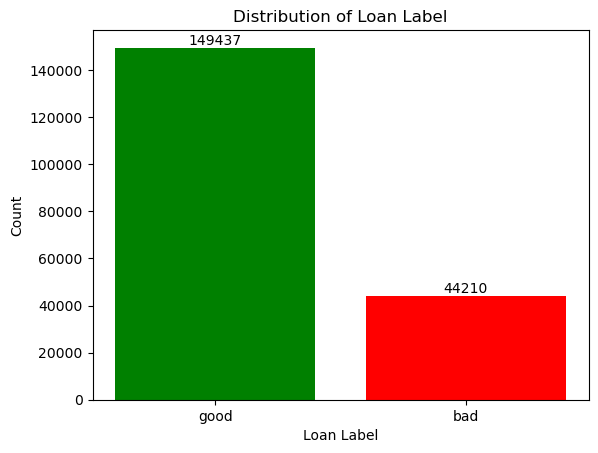

In [39]:
# count the occurrences of each loan category
loan_category_counts = X_train['loan_label'].value_counts()

# set colors for different loan categories
colors = ['green', 'red']

# plot the distribution of loan label
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Label')
plt.ylabel('Count')
plt.title('Distribution of Loan Label')

# add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [40]:
# import library
from imblearn.over_sampling import RandomOverSampler

# conducting oversampling using randomoversampler because it's simple and easy to implement and less sensitive to noisy data
# test for overfitting will be conducted later
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

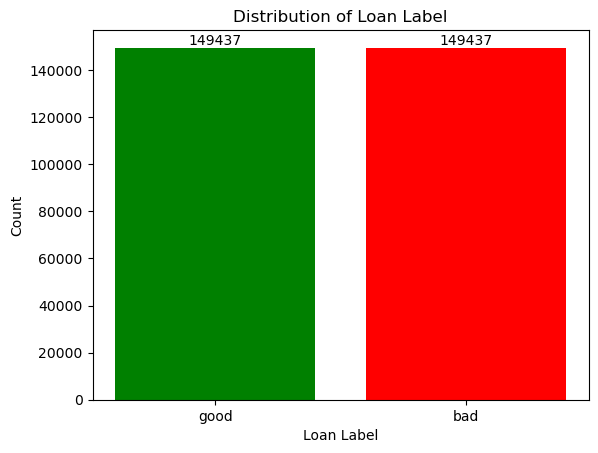

In [41]:
# count the occurrences of each loan category
loan_category_counts = X_train['loan_label'].value_counts()

# set colors for different loan categories
colors = ['green', 'red']

# plot the distribution of loan label
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Label')
plt.ylabel('Count')
plt.title('Distribution of Loan Label')

# add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [42]:
# droping target column
X_train = X_train.drop('loan_label', axis=1)
X_test = X_test.drop('loan_label', axis=1)

In [43]:
# check dataframe shape
X_train.shape, X_test.shape

((298874, 53), (48412, 53))

In [44]:
# import library
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# initialize dictionary to store classification reports
classification_reports = {}
model_names = []
accuracies = []

# train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # handle zero division
    )

    # store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.97      0.68      0.80     11122
         Bad       0.91      0.99      0.95     37290

    accuracy                           0.92     48412
   macro avg       0.94      0.84      0.87     48412
weighted avg       0.93      0.92      0.92     48412

Random Forest Accuracy: 0.9213
Training Logistic Regression...


C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.84      0.71      0.77     11122
         Bad       0.92      0.96      0.94     37290

    accuracy                           0.90     48412
   macro avg       0.88      0.83      0.85     48412
weighted avg       0.90      0.90      0.90     48412

Logistic Regression Accuracy: 0.9012
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recall  f1-score   support

        Good       0.70      0.72      0.71     11122
         Bad       0.92      0.91      0.91     37290

    accuracy                           0.86     48412
   macro avg       0.81      0.81      0.81     48412
weighted avg       0.87      0.86      0.86     48412

Decision Tree Accuracy: 0.8636
Training Gradient Boosting...
Evaluating Gradient Boosting...

Classification Report:
              precision    recall  f1-score   support

 

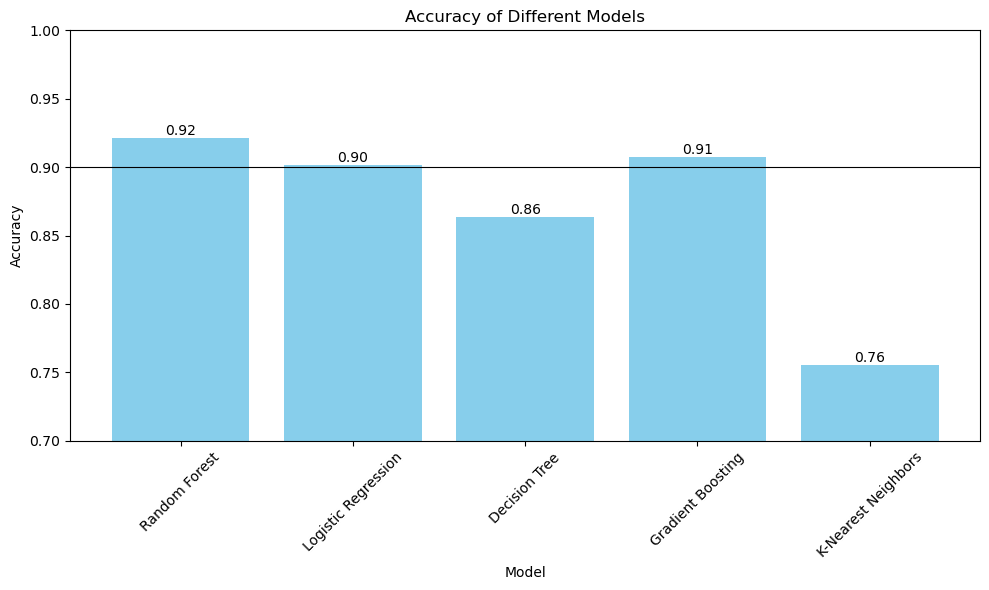

In [45]:
# create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# add annotations in the middle of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# set y-axis limits to 0-1 for accuracy percentage
plt.ylim(0.7, 1)

# rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# add horizontal axis line at y=0.9
plt.axhline(0.9, color='black', linewidth=0.8)

plt.show()

we can see that the random forest model give the highes accuracy (0.92) where:
- f1≥0.9: excellent
- 0.8≤f1<0.9: very good
- 0.7≤f1<0.8: good
- 0.6≤f1<0.7: fair
- f1<0.6: poor

we will evaluate the model performance with auc and ks since it is the most common test to evaluate credit risk modeling

In [46]:
# converting target to numerical so we can evaluate it with auc and ks
Y_train = Y_train.map({'good': 1, 'bad': 0})
Y_train = Y_train.astype(int)

Y_test = Y_test.map({'good': 1, 'bad': 0})
Y_test = Y_test.astype(int)

In [47]:
# initialize model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)

y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

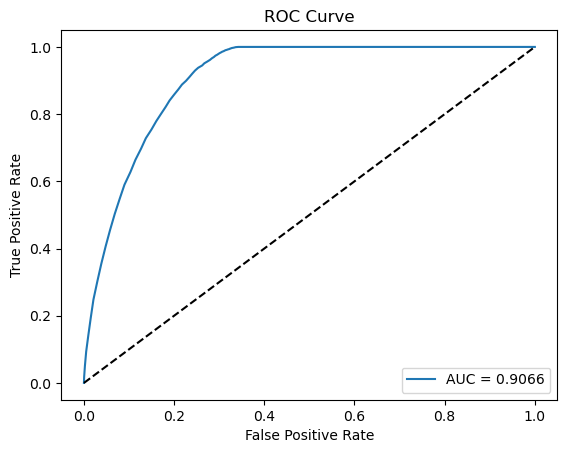

In [48]:
# import library
from sklearn.metrics import roc_curve, roc_auc_score

# initialize auc
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [49]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6849')

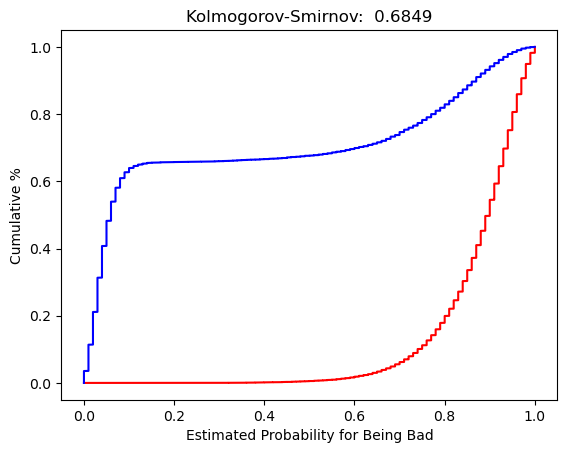

In [50]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

the model result for auc is 0.90 and ks is 0.68 (on credit risk modeling auc > 0.7 and ks > 0.2 is considered a good performance, which the threshold for each test are:

AUC:
- auc = 0.5: random classifier (no discrimination)
- 0.5 < auc < 0.7: poor discrimination
- 0.7 ≤ auc < 0.8: acceptable discrimination
- 0.8 ≤ auc < 0.9: excellent discrimination
- auc ≥ 0.9: outstanding discrimination

KS:
- ks = 0: the distributions of positive and negative samples are identical
- 0 < ks < 0.2: very small difference between distributions
- 0.2 ≤ ks < 0.5: moderate difference
- ks ≥ 0.5: considerable difference

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Fold 1: Accuracy = 0.9860
Fold 2: Accuracy = 0.9860
Fold 3: Accuracy = 0.9847
Fold 4: Accuracy = 0.9868
Fold 5: Accuracy = 0.9852
Mean Accuracy: 0.9857
Standard Deviation: 0.0007


the k fold cross validation result indicate a model with high accuracy (around 98.5%) and low standard deviation, suggesting that the model performs consistently well across different subsets of the data

In [52]:
# generating feature importances
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
50,recoveries,0.278256
48,out_prncp,0.134138
39,int_rate,0.069484
41,dti,0.062183
46,revol_util,0.054576
40,annual_inc,0.054308
45,revol_bal,0.052920
38,loan_amnt,0.046909
47,total_acc,0.043511
49,total_rec_late_fee,0.022119


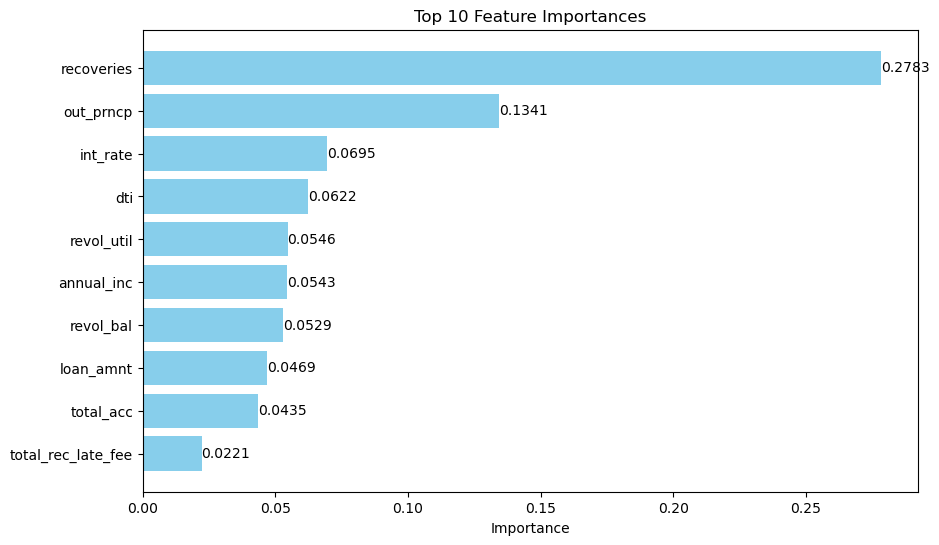

In [53]:
# showing top 10 feature importance on bar chart
df_top_features = df_all_features.head(10).sort_values(by='importance', ascending=True)

# plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top_features['feature'], df_top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')

# annotating the bars with the importance values
for index, value in enumerate(df_top_features['importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.show()